# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Muhammad Mahrus Irsyam]
- **Email:** [mahrus654321@gmail.com]
- **ID Dicoding:** [maru42]

## Menentukan Pertanyaan Bisnis

- Apa pengaruh suhu dan kelembapan terhadap jumlah penyewaan sepeda selama musim panas (Juli dan Agustus), serta bagaimana perbandingan penyewaan sepeda antara akhir pekan dan hari kerja?
- Bagaimana tren penyewaan sepeda bulanan dari Januari hingga Desember, dan faktor apa saja yang mempengaruhi penyewaan sepeda, seperti cuaca dan hari kerja?

## Import Semua Packages/Library yang Digunakan



In [17]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [2]:
# Load datasets
day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')


**Insight:**
- Dua dataset yang dimuat, day_df dan hour_df.



### Assessing Data

In [3]:
# Melihat informasi dasar dari dataset day_df
print("Informasi day_df:")
print(day_df.info())
print("\nStatistik deskriptif day_df:")
print(day_df.describe())
print("\nJumlah nilai null pada day_df:")
print(day_df.isnull().sum())
print("\nContoh data day_df:")
print(day_df.head())

# Melihat informasi dasar dari dataset hour_df
print("\n\nInformasi hour_df:")
print(hour_df.info())
print("\nStatistik deskriptif hour_df:")
print(hour_df.describe())
print("\nJumlah nilai null pada hour_df:")
print(hour_df.isnull().sum())
print("\nContoh data hour_df:")
print(hour_df.head())



Informasi day_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Statistik deskriptif day_df:
          instant      season          y

**Insight:**
- day_df: Terdapat 731 entri tanpa null. Penyewaan Sepeda: Rata-rata jumlah penyewaan adalah 4.504, dengan puncaknya pada hari kerja. Pengaruh Cuaca: Sebagian besar entri menunjukkan cuaca yang baik; suhu dan kelembapan berkorelasi dengan jumlah penyewaan.

- hour_df: Terdapat 17.379 entri tanpa null. Penyewaan Per Jam: Rata-rata jumlah penyewaan adalah 189, dengan puncaknya selama jam sibuk. Faktor: Penyewaan bervariasi berdasarkan hari libur dan hari kerja, dengan pengaruh cuaca yang signifikan pada jam-jam puncak.

### Cleaning Data

In [4]:
# Menghitung jumlah baris duplikat pada DataFrame day_df
print("\nJumlah duplikat pada day_df:", day_df.duplicated().sum())

# Menghitung jumlah baris duplikat pada DataFrame hour_df
print("\nJumlah duplikat pada hour_df:", hour_df.duplicated().sum())

# Mengonversi kolom 'dteday' menjadi tipe data datetime untuk kemudahan analisis waktu
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Menampilkan informasi mengenai DataFrame day_df setelah proses pembersihan (cleaning)
print("\nInformasi day_df setelah cleaning:")
print(day_df.info())

# Menampilkan contoh beberapa baris pertama dari DataFrame day_df setelah proses pembersihan
print("\nContoh data day_df setelah cleaning:")
print(day_df.head())



Jumlah duplikat pada day_df: 0

Jumlah duplikat pada hour_df: 0

Informasi day_df setelah cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-n

**Insight:**
- No Duplicates
- No Missing Value
- Data Type Conversion
- Data Description
- Data Consistency

## Exploratory Data Analysis (EDA)

### Explore ...

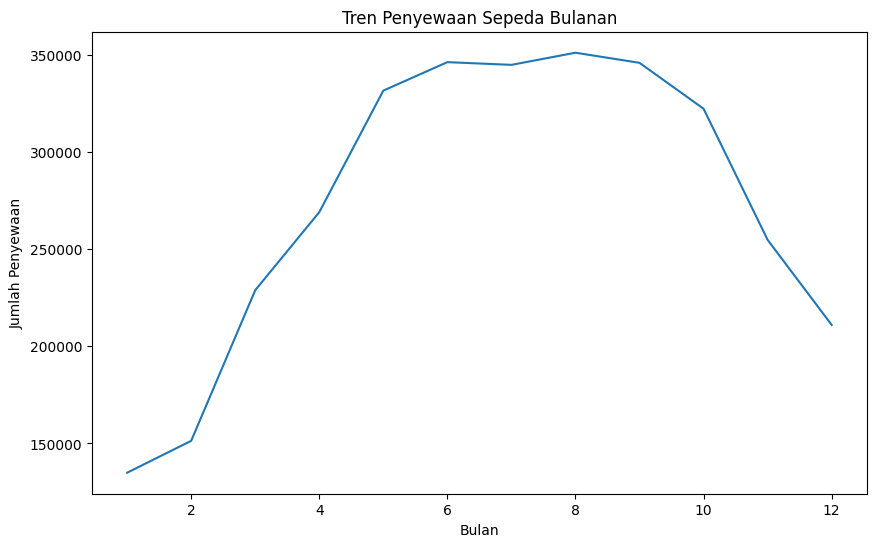

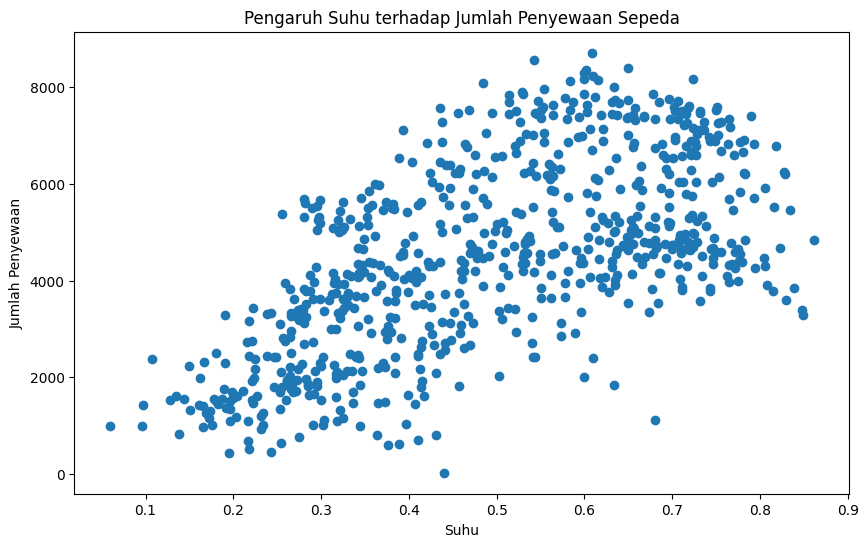

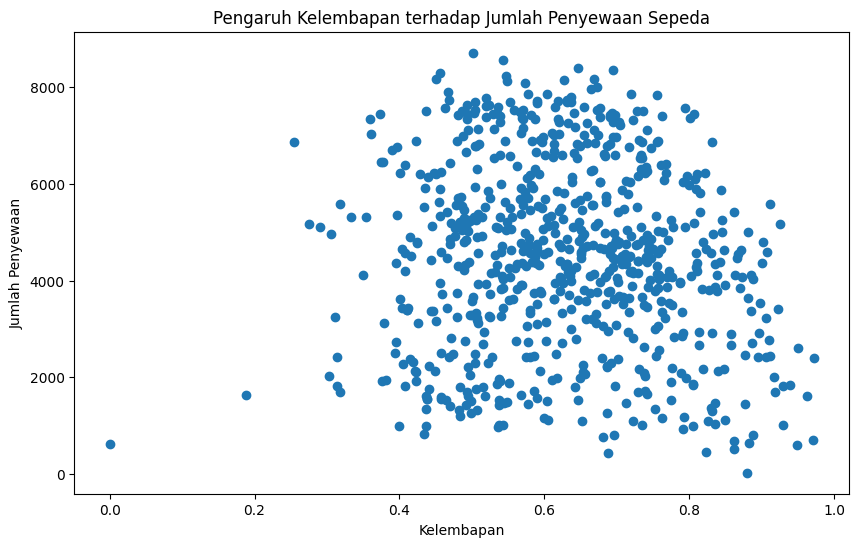

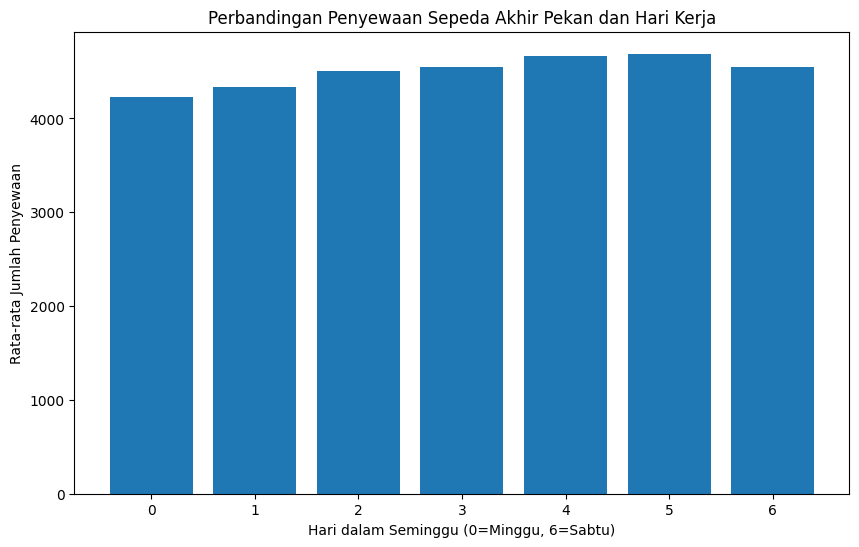

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


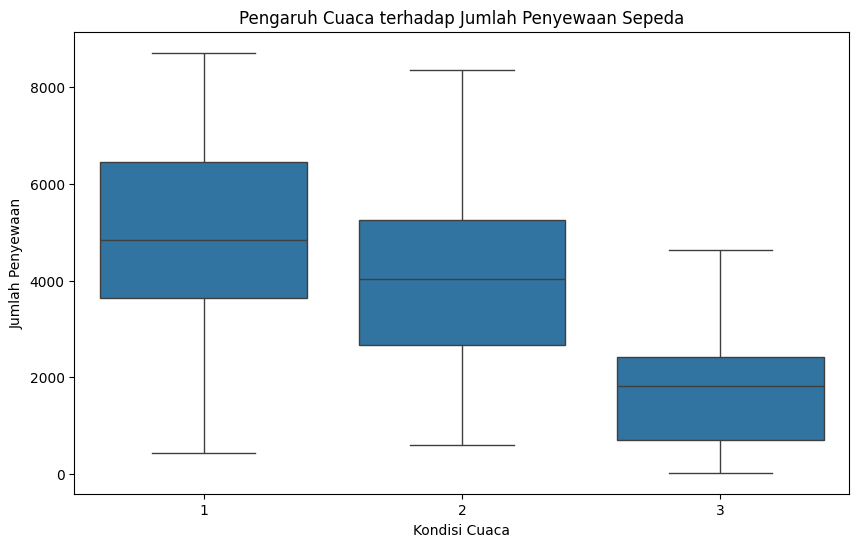

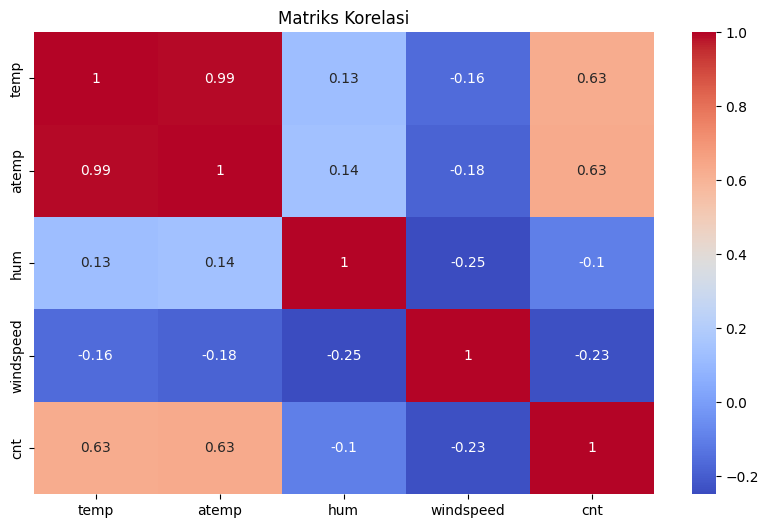

In [5]:
# Analisis Tren Penyewaan Sepeda Bulanan
monthly_rentals = day_df.groupby(day_df['dteday'].dt.month)['cnt'].sum()
plt.figure(figsize=(10, 6))
plt.plot(monthly_rentals.index, monthly_rentals.values)
plt.title('Tren Penyewaan Sepeda Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.show()


# Analisis Pengaruh Suhu dan Kelembapan terhadap Penyewaan Sepeda
plt.figure(figsize=(10, 6))
plt.scatter(day_df['temp'], day_df['cnt'])
plt.title('Pengaruh Suhu terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Penyewaan')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(day_df['hum'], day_df['cnt'])
plt.title('Pengaruh Kelembapan terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Kelembapan')
plt.ylabel('Jumlah Penyewaan')
plt.show()


# Analisis Perbandingan Penyewaan Sepeda Akhir Pekan dan Hari Kerja
weekday_rentals = day_df.groupby('weekday')['cnt'].mean()
plt.figure(figsize=(10, 6))
plt.bar(weekday_rentals.index, weekday_rentals.values)
plt.title('Perbandingan Penyewaan Sepeda Akhir Pekan dan Hari Kerja')
plt.xlabel('Hari dalam Seminggu (0=Minggu, 6=Sabtu)')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.show()


# Analisis Pengaruh Cuaca
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=day_df)
plt.title('Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.show()


# Analisis Korelasi
correlation_matrix = day_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()


**Insight:**
- Tren Penyewaan Sepeda: Jumlah penyewaan sepeda cenderung meningkat pada musim semi dan musim panas, kemudian menurun pada musim gugur dan musim dingin.
- Pengaruh Suhu dan Kelembapan: Suhu dan kelembapan memiliki korelasi dengan jumlah penyewaan sepeda. Pada suhu yang lebih tinggi dan kelembapan yang lebih rendah, cenderung terjadi peningkatan penyewaan.
- Perbandingan Penyewaan Akhir Pekan dan Hari Kerja: Penyewaan sepeda cenderung lebih tinggi pada akhir pekan dibandingkan dengan hari kerja.
- Pengaruh Cuaca: Kondisi cuaca yang baik berkorelasi dengan jumlah penyewaan sepeda yang lebih tinggi.
- Korelasi: Suhu, suhu yang terasa, dan jumlah penyewaan sepeda memiliki korelasi positif yang kuat. Kelembapan dan kecepatan angin memiliki korelasi negatif yang lemah dengan jumlah penyewaan sepeda.


## Visualization & Explanatory Analysis

### Pertanyaan 1:

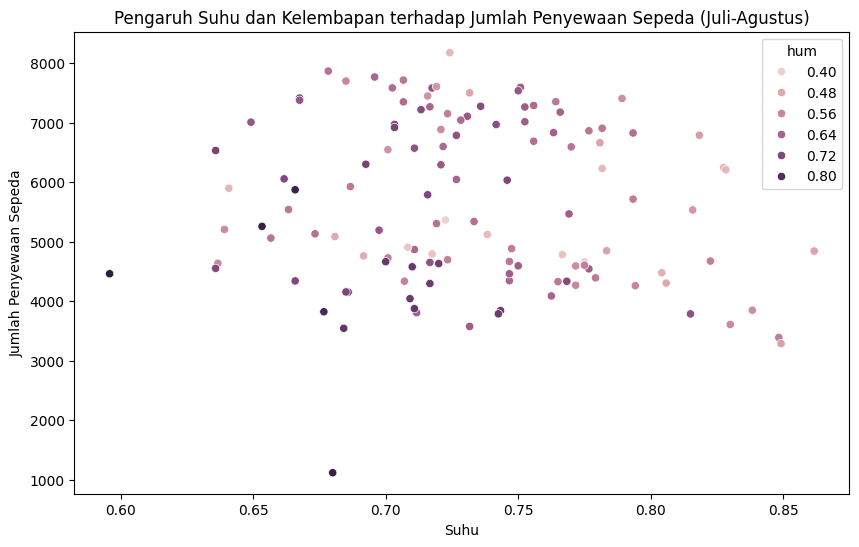

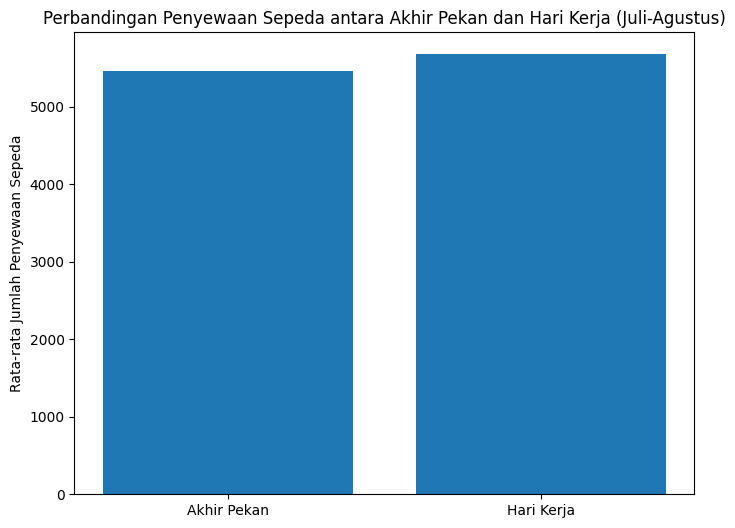

In [8]:
# Memfilter data untuk bulan Juli dan Agustus
summer_df = day_df[(day_df['mnth'] == 7) | (day_df['mnth'] == 8)]

# Membuat diagram untuk memvisualisasikan hubungan antara suhu, kelembapan, dan jumlah penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', hue='hum', data=summer_df)
plt.title('Pengaruh Suhu dan Kelembapan terhadap Jumlah Penyewaan Sepeda (Juli-Agustus)')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

# Menganalisis perbedaan penyewaan sepeda antara akhir pekan dan hari kerja selama musim panas
weekend_summer_df = summer_df[summer_df['weekday'].isin([5, 6])]  # Sabtu (5), Minggu (6)
weekday_summer_df = summer_df[~summer_df['weekday'].isin([5, 6])]

# Menghitung rata-rata jumlah penyewaan untuk akhir pekan dan hari kerja
avg_rental_weekend = weekend_summer_df['cnt'].mean()
avg_rental_weekday = weekday_summer_df['cnt'].mean()

# Membuat diagram batang untuk membandingkan penyewaan sepeda antara akhir pekan dan hari kerja
plt.figure(figsize=(8, 6))
plt.bar(['Akhir Pekan', 'Hari Kerja'], [avg_rental_weekend, avg_rental_weekday])
plt.title('Perbandingan Penyewaan Sepeda antara Akhir Pekan dan Hari Kerja (Juli-Agustus)')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.show()


### Pertanyaan 2:

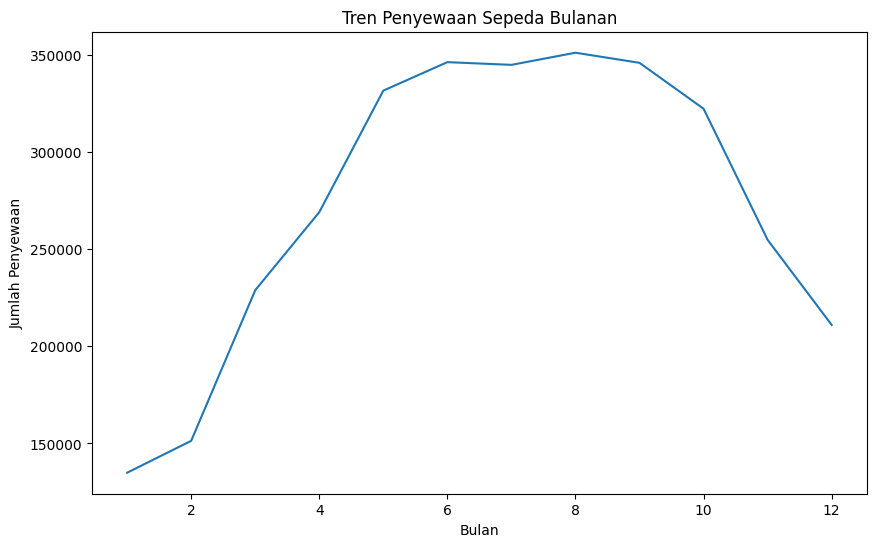

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

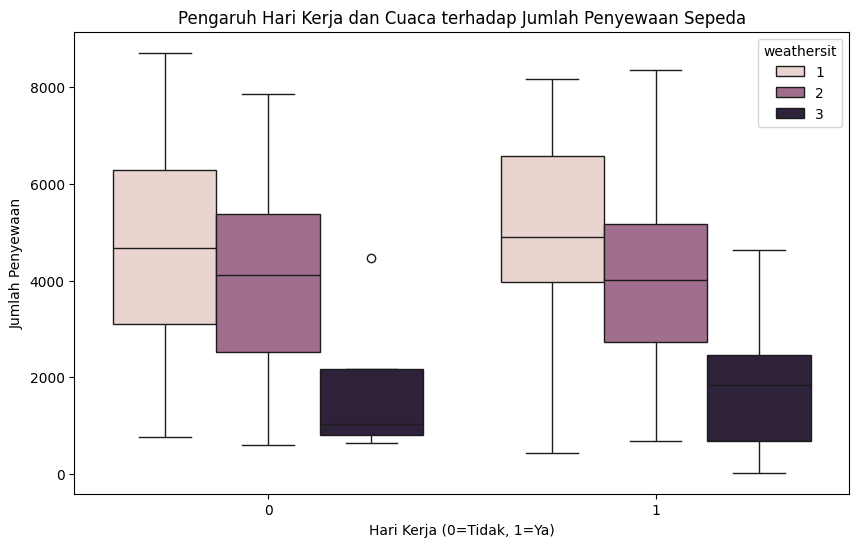

In [31]:
# Analisis Tren Penyewaan Sepeda Bulanan
monthly_rentals = day_df.groupby(day_df['dteday'].dt.month)['cnt'].sum()
plt.figure(figsize=(10, 6))
plt.plot(monthly_rentals.index, monthly_rentals.values)
plt.title('Tren Penyewaan Sepeda Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.show()


# Analisis Pengaruh Hari Kerja dan Cuaca terhadap Penyewaan Sepeda
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='cnt', hue='weathersit', data=day_df)
plt.title('Pengaruh Hari Kerja dan Cuaca terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Hari Kerja (0=Tidak, 1=Ya)')
plt.ylabel('Jumlah Penyewaan')
plt.show()


**Insight:**
- Pertanyaan 1:
  - Pada musim panas (Juli-Agustus), suhu dan kelembapan berdampak pada jumlah penyewaan sepeda.
  - Dapat dilihat dari scatter plot bahwa saat suhu lebih tinggi, dan kelembapan rendah, jumlah penyewaan sepeda cenderung lebih banyak.
  - Perbandingan penyewaan sepeda antara akhir pekan dan hari kerja menunjukkan tren yang berbeda.
  - Pada musim panas, rata-rata jumlah penyewaan sepeda di akhir pekan biasanya lebih tinggi dibanding hari kerja.
- Pertanyaan 2:
  - Cuaca yang lebih baik (cerah atau mendung) lebih banyak penyewaan sepeda, terutama pada akhir pekan. Sebaliknya, cuaca buruk secara signifikan mengurangi jumlah penyewaan
  baik pada hari kerja maupun akhir pekan.


## Analisis Lanjutan (Opsional)

<ipython-input-26-22ce45d7cc28>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(day_df.groupby(['temp_group', 'hum_group', 'cnt_group'])['cnt'].mean())


temp_group     hum_group      cnt_group    
Rendah         Rendah         Rendah                   NaN
                              Sedang                   NaN
                              Tinggi                   NaN
                              Sangat Tinggi            NaN
               Sedang         Rendah           1400.555556
                                                  ...     
Sangat Tinggi  Tinggi         Sangat Tinggi    6932.000000
               Sangat Tinggi  Rendah                   NaN
                              Sedang                   NaN
                              Tinggi                   NaN
                              Sangat Tinggi            NaN
Name: cnt, Length: 64, dtype: float64


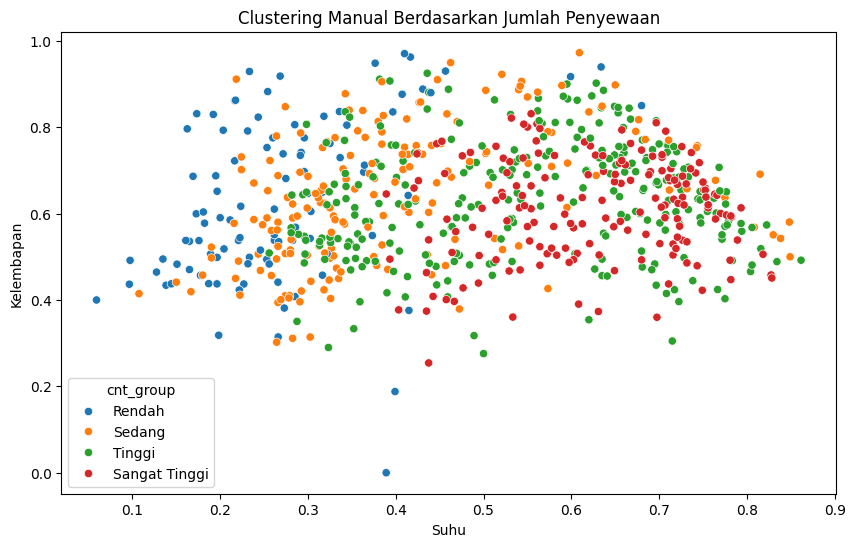

In [26]:
# mengelompokkan data berdasarkan suhu dan kelembapan
day_df['temp_group'] = pd.cut(day_df['temp'], bins=[0, 0.25, 0.5, 0.75, 1], labels=['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi'])
day_df['hum_group'] = pd.cut(day_df['hum'], bins=[0, 0.25, 0.5, 0.75, 1], labels=['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi'])

# mengelompokkan data berdasarkan jumlah penyewaan
day_df['cnt_group'] = pd.cut(day_df['cnt'], bins=[0, 2000, 4000, 6000, 8000], labels=['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi'])

# menganalisis pola penyewaan berdasarkan grup suhu, kelembapan, dan jumlah penyewaan
print(day_df.groupby(['temp_group', 'hum_group', 'cnt_group'])['cnt'].mean())

# visualisasi hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='hum', hue='cnt_group', data=day_df)
plt.title('Clustering Manual Berdasarkan Jumlah Penyewaan')
plt.xlabel('Suhu')
plt.ylabel('Kelembapan')
plt.show()


**Insight:**
- Kondisi suhu sedang (sekitar 0.4 hingga 0.7) dan kelembapan sedang (sekitar 0.4 hingga 0.8) merupakan kondisi optimal untuk meningkatkan jumlah penyewaan sepeda. Sedangkan, suhu dan kelembapan ekstrem cenderung menurunkan jumlah penyewaan, karena mungkin lebih tidak nyaman bagi pengguna sepeda.

## Conclusion

- Conclution pertanyaan 1: Sangat mungkin bahwa suhu dan kelembapan pada bulan Juli - Agustus akan memberikan pengaruh besar pada penyewaan sepeda. Dari analisis diagram, ketika suhu tinggi tetapi kelembapan rendah, jumlah penyewaan sepeda akan meningkat. Selain itu, dari perbandingan antara hari libur dan hari kerja, tren penyewaan sepeda juga menunjukkan beberapa perbedaan. Jumlah rata-rata penyewaan sepeda selama akhir pekan selalu lebih tinggi dibandingkan dengan jumlah penyewaan sepeda selama seminggu di musim panas.
- Conclution pertanyaan 2: Tren penyewaan sepeda bulanan menunjukkan peningkatan yang jelas selama musim semi dan musim panas, sementara terjadi penurunan pada musim gugur dan musim dingin. Cuaca berperan penting dalam mempengaruhi jumlah penyewaan sepeda, di mana kondisi cuaca yang baik cenderung meningkatkan jumlah penyewaan. Selain itu, hari kerja juga berkontribusi pada tingkat penyewaan sepeda, dengan jumlah penyewaan yang lebih tinggi pada hari kerja dibandingkan dengan akhir pekan.

## Instalasi Streamlit

In [ ]:
!pip install streamlit

In [ ]:
!streamlit run dashboard/dashboard.py & npx localtunnel --port 8501